# Regressao Linear

Aula pratica de regressao linear. O objetivo é prever o custo da diaria de um imovel baseado no numero de pessoas

In [11]:
# importando as bibliotecas
import pandas as pd # trabalhar com tabelas e importacao dos arquivos utilizados
import plotly.express as px # biblioteca para criar graficos dinamicos
import seaborn as sns # blbioteca para graficos
import numpy as np # funcoes matematicas de alto nivel

Abrindo o arquivo contendo os dados utilizados na regressao

In [ ]:
base_custo_diaria = pd.read_csv('base_custo_diaria.csv', sep=';')

In [ ]:
# visualizando arquivo da base de dados
base_custo_diaria.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             4           385
2             6           499
3            10           680
4            13           735
5            15           859
6            18           989
7            22          1075
8            25          1500
9            30          1850
10           40          2000
11           42          2089
12           45          2250
13           47          2488
14           50          2680>

In [ ]:
# algumas estatisticas da base de dados
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


Criando as variaveis que serao utilizadas no modelo

In [ ]:
# criando variavel independente (nro de pessoas)
X_custo_diaria = base_custo_diaria.iloc[:,0].values # buscamos todos os registros da primeira coluna e convertemos no formato de array
# o comando iloc permite selecionar um conjunto de registros, o dois pontos ":" significa que estamos selecionando todos os registros e zero "0" a primeira coluna
X_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [ ]:
# criando variavel dependente (o que queremos predizer - valor da diaria)
y_custo_diaria = base_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [ ]:
np.corrcoef(X_custo_diaria, y_custo_diaria) #mostra uma matriz pra ver se tem correlacao entre os dois parametro

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

# **Correlação**

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variavel cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variavel nao tem efeito sobre outra variavel

<Axes: >

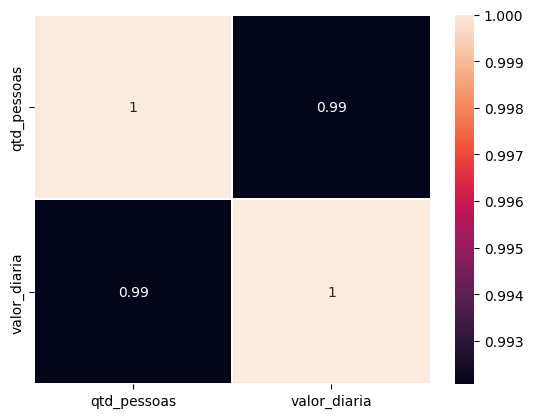

In [ ]:
correlation = base_custo_diaria.corr()
# plot da matriz de correlacao
plot = sns.heatmap(correlation, annot = True, linewidths=.3)
plot

Perceba que temos uma correlação forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diaria também aumenta.
Além disso, podemos dizer que em 99% do valor cobrado pelas diarias pode ser explicado pela quantidade de pessoas alugando o imovel

# Tratando os dados para o modelo

Nesse passo vamos realizar transformações dos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicita como entrada.

In [ ]:
# visualizar o formato da variavel
X_custo_diaria.shape

(15,)

In [10]:
# visualizando variavel
X_custo_diaria # o resultado mostra que temos uma array com apenas uma coluna/dimensao. No entanto precisamos ter uma matriz com duas colunas.

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [12]:
X_custo_diaria = X_custo_diaria.reshape(-1,1)
X_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [13]:
# agora nos temos uma matriz com duas colunas, 10 linhas e uma coluna
X_custo_diaria.shape

(15, 1)

# Aplicando os dados ao algoritmo de machine de regressão

In [14]:
from sklearn.linear_model import LinearRegression
# cria um obj do tipo regressao linear
previsao_custo_diaria = LinearRegression()

In [15]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

# Realizando o treinamento do modelo

In [17]:
previsao_custo_diaria.fit(X_custo_diaria, y_custo_diaria)

LinearRegression()

In [21]:
# verificando a intercepcao (constante)
previsao_custo_diaria.intercept_

155.91874556932066

In [22]:
# verificando o coeficiente angular da reta (coeficiente)
previsao_custo_diaria.coef_

array([48.61472504])

In [23]:
previsao_precos = previsao_custo_diaria.predict(X_custo_diaria) # baseado no nro de pessoas vamos estimar o valor da diaria

In [24]:
# visualiza as previsoes para cada nro de pessoas
previsao_precos

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

# Visualizando no gráfico as disposições dos dados

Para visualizar os dados no gráfico, temos que transformar os valores das variáveis para o formato de vetor. Para isso utilizamos o comando ravel()

In [25]:
X_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [27]:
X_custo_diaria.ravel() # transforma novamente em um vetor (array)

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [28]:
y_custo_diaria # ja esta no formato correto, nao precisa mudar

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [29]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [30]:
grafico = px.scatter(x = X_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = X_custo_diaria.ravel(), y = previsao_precos, name = 'previsoes')
grafico.show()

In [32]:
# verificando os valores de uma determinada previsao baseada na quantidade de pessoas
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([350.37764575])

In [37]:
qtd_pessoas = 32
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([1711.589947])

In [38]:
# verificando de modo direto
previsao_custo_diaria.predict([[42]])

array([2197.73719745])

In [39]:
# indica a qualidade do algoritmo
previsao_custo_diaria.score(X_custo_diaria, y_custo_diaria)

0.984200996064679

In [40]:
# visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

In [41]:
MSE

9989.829839426571

In [42]:
# calculando MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

83.84480977618742

In [43]:
# calculando RMSE - desvio padrao
np.sqrt(MSE)

99.9491362615334